# Data mining the Gaia star archive
### Question: The Gaia database contains billions of stars. Using data mining techniques, identify groups of stars that belong together
Stars that formed from the same cloud, older clusters broke apart - more difficult to classify. Use unsupervised machine learning algorithms to classify star clusters.

Gaia archive: https://gea.esac.esa.int/archive/

Data explained: https://www.cosmos.esa.int/web/gaia/dr2

Gaia data set two was taken on 25 July 2014 (10:30 UTC) and 23 May 2016

In [1]:
import pandas as pd
df = pd.read_csv("GaiaSource_000-020-110.csv")
stats = df.describe()
stats

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,...,scan_direction_mean_k3,scan_direction_mean_k4,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,l,b,ecl_lon,ecl_lat
count,1.705790e+05,1.705790e+05,1.705790e+05,170579.0,170579.000000,170579.000000,170579.000000,170579.000000,403.000000,403.000000,...,170579.000000,170579.000000,170579.000000,1.705790e+05,170579.000000,170579.000000,170579.000000,170579.000000,170579.000000,170579.000000
mean,1.635378e+18,6.916184e+18,5.710462e+08,2015.0,314.445730,9.989248,-2.558527,5.915029,2.842900,0.633141,...,-4.029097,27.643187,57.872288,1.374082e+04,26.393011,18.201054,46.092700,-29.074272,316.145533,14.042220
std,0.000000e+00,7.824116e+14,3.303331e+08,0.0,1.494900,10.504467,0.971403,5.701347,3.065102,0.212730,...,28.123823,1.589400,15.012840,3.072943e+05,1058.442394,1.811302,1.441368,1.257351,1.575566,0.914638
min,1.635378e+18,6.914851e+18,1.177300e+04,2015.0,310.788140,0.148633,-4.775293,0.103670,-1.791382,0.224590,...,-59.998318,20.475262,11.000000,1.258887e+01,0.546064,6.296060,42.849223,-31.893663,312.234516,11.766862
25%,1.635378e+18,6.915492e+18,2.840771e+08,2015.0,313.376715,3.436794,-3.331537,1.383367,1.155185,0.460758,...,-24.187854,26.690452,48.000000,2.321637e+02,2.780138,17.234616,44.938345,-30.102178,315.080043,13.390512
50%,1.635378e+18,6.916201e+18,5.700315e+08,2015.0,314.614848,4.602855,-2.642237,4.267861,1.996829,0.638235,...,-3.065681,27.744164,59.000000,5.945685e+02,3.730346,18.589265,46.105692,-29.023634,316.303455,14.025367
75%,1.635378e+18,6.916868e+18,8.582401e+08,2015.0,315.537785,13.754998,-1.843954,9.027622,3.569003,0.817786,...,11.675235,28.743473,69.000000,2.070435e+03,6.488504,19.610284,47.280949,-28.089637,317.342888,14.697067
max,1.635378e+18,6.917529e+18,1.142677e+09,2015.0,317.798057,91.395674,-0.002570,84.366297,23.499923,0.994737,...,59.995136,35.308086,114.000000,4.914554e+07,308189.671077,22.774803,48.915665,-26.394036,319.488987,16.333882


In [2]:
#glimps of the data
df.head(5) #df[0:5] does the same thing

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,...,scan_direction_mean_k4,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_variable_flag,l,b,ecl_lon,ecl_lat
0,1635378410781933568,6914851441950097280,644618244,2015.0,312.115755,3.956164,-3.740349,1.404508,NaN,NaN,...,28.036676,68,4444.580030,4.916518,16.405193,NOT_AVAILABLE,43.620180,-27.630762,313.504567,13.567278
1,1635378410781933568,6914851476309836160,668015830,2015.0,312.134332,4.045969,-3.739628,1.437343,NaN,NaN,...,28.035465,69,5137.131412,7.556112,16.247968,NOT_AVAILABLE,43.630971,-27.646661,313.523107,13.562885
2,1635378410781933568,6914851476309836800,609250353,2015.0,312.138582,25.938898,-3.737056,11.683244,NaN,NaN,...,23.329552,33,416.763565,3.129720,18.975046,NOT_AVAILABLE,43.635821,-27.649139,313.528028,13.564193
3,1635378410781933568,6914851476309838848,393393107,2015.0,312.131173,24.819271,-3.735257,11.175843,NaN,NaN,...,23.574673,31,353.162079,3.602725,19.154835,NOT_AVAILABLE,43.633581,-27.641793,313.521223,13.567953
4,1635378410781933568,6914851476309839872,241639886,2015.0,312.134676,23.953915,-3.733854,10.811309,NaN,NaN,...,23.329810,33,251.991138,3.906820,19.521307,NOT_AVAILABLE,43.636869,-27.644181,313.525077,13.568342


In [3]:
N = len(df)
print('Data loaded. Contains {} samles.'.format(N))

Data loaded. Contains 170579 samles.


In [4]:
cols = list(df)
print('Data contains {} columns'.format(len(cols)))

Data contains 57 columns


In [5]:
N = df.shape[0]
P = df.shape[1]

print('Data has {} rows, {} columns'.format(N, P))

Data has 170579 rows, 57 columns


### How many parallaxes are negative?

In [6]:
import math

#greater than 0 parallax
above = df[ 0 < df.parallax]
#less than 0 parallax
below = df[ 0 >= df.parallax]

a = above.shape[0]
b = below.shape[0]

print(a)
print(b)

b / (b+a)

385
18


0.04466501240694789

In [7]:
#Shows each column and the type of each
df.dtypes #no spectra data

solution_id                        int64
source_id                          int64
random_index                       int64
ref_epoch                        float64
ra                               float64
ra_error                         float64
dec                              float64
dec_error                        float64
parallax                         float64
parallax_error                   float64
pmra                             float64
pmra_error                       float64
pmdec                            float64
pmdec_error                      float64
ra_dec_corr                      float64
ra_parallax_corr                 float64
ra_pmra_corr                     float64
ra_pmdec_corr                    float64
dec_parallax_corr                float64
dec_pmra_corr                    float64
dec_pmdec_corr                   float64
parallax_pmra_corr               float64
parallax_pmdec_corr              float64
pmra_pmdec_corr                  float64
astrometric_n_ob

### Below: 1 degree box
#### RA: 10-11degree, DEC: 0-1
https://gea.esac.esa.int/archive/

Stellarium: 16-17 stars

Gaia: 2987 stars

SQL: SELECT * 
from gaiadr2.gaia_source 
where 
RA between 10 and 11 AND
DEC between 0 and 1


In [8]:
one_degree_box = pd.read_csv("1degree.csv")
one_degree_box.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,...,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper
count,2.987000e+03,2.987000e+03,2.987000e+03,2987.0,2987.000000,2987.000000,2987.000000,2987.000000,2362.000000,2362.000000,...,401.000000,401.000000,401.000000,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,1.635721e+18,2.545348e+18,8.348150e+08,2015.5,10.493477,2.463617,0.497418,1.399731,1.118871,0.515015,...,0.145748,0.080983,0.232484,200111.0,1.146199,1.037363,1.228500,2.469787,2.134659,2.804914
std,0.000000e+00,2.906554e+15,4.872723e+08,0.0,0.294380,7.761182,0.289191,4.448988,1.631237,0.463866,...,0.164295,0.124251,0.199014,0.0,1.541179,1.378242,1.635531,13.575517,10.984913,16.270136
min,1.635721e+18,2.543035e+18,1.729800e+04,2015.5,10.000043,0.020369,0.000095,0.014438,-5.938072,0.022573,...,0.003000,0.000000,0.017100,200111.0,0.500944,0.348610,0.508067,0.030641,0.029643,0.031640
25%,1.635721e+18,2.543104e+18,4.181524e+08,2015.5,10.236596,0.167316,0.241739,0.111729,0.274800,0.138554,...,0.037000,0.006900,0.093100,200111.0,0.657643,0.589448,0.704749,0.188104,0.171484,0.201126
50%,1.635721e+18,2.543315e+18,8.389194e+08,2015.5,10.485396,0.496462,0.488284,0.357365,0.859963,0.382675,...,0.093000,0.032600,0.168300,200111.0,0.833459,0.757096,0.890149,0.466593,0.407986,0.532451
75%,1.635721e+18,2.549134e+18,1.255057e+09,2015.5,10.754713,1.217741,0.747516,0.866748,1.713874,0.760717,...,0.192300,0.107000,0.304600,200111.0,1.088864,1.017593,1.195962,1.154610,1.032632,1.304638
max,1.635721e+18,2.549394e+18,1.691948e+09,2015.5,10.999717,88.285228,0.999616,62.026589,28.199629,3.248399,...,1.065500,0.821900,1.213100,200111.0,19.346436,17.540230,20.250835,197.145390,145.256930,249.033840


In [9]:
N = len(one_degree_box)
print('Data loaded. Contains {} samles.'.format(N))

Data loaded. Contains 2987 samles.


In [10]:
#how many parallaxes are negative?
import math
#greater than 0 parallax
above = one_degree_box[ 0 < one_degree_box.parallax]
#less than 0 parallax
below = one_degree_box[ 0 >= one_degree_box.parallax]

a = above.shape[0]
b = below.shape[0]

print(a)
print(b)

b / (b+a)

1986
376


0.15918712955122777

In [11]:
data = one_degree_box[['ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'phot_g_mean_flux', 'phot_g_mean_mag', 'b', 'l']]

<function matplotlib.pyplot.show(*args, **kw)>

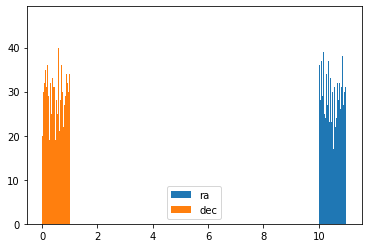

In [62]:
import matplotlib
import matplotlib.pyplot as plt
plt.hist(data['ra'], label='ra', bins=100)
plt.hist(data['dec'], label='dec', bins=100)
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

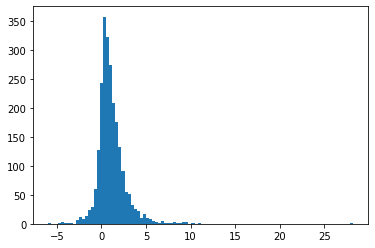

In [61]:
plt.hist(data['parallax'], bins=100)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

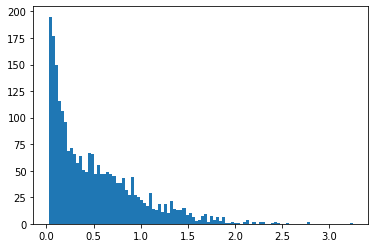

In [14]:
plt.hist(data['parallax_error'], bins=100)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

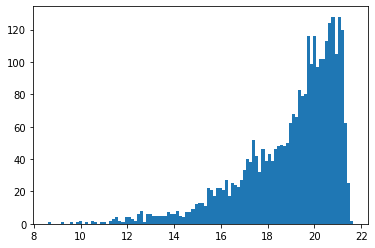

In [15]:
plt.hist(data['phot_g_mean_mag'], bins=100)
plt.show

## Find distance
distance = 1/parallax

Transverse velocity in right ascension: vTra(km/s) = pmra(arcsec/yr) * d * 4.740

Transverse velocity in declination: vTdec(km/s) = pmdec(arcsec/yr) * d * 4.740

#### parallax: 
- arcseconds or milliarcseconds
- apparent shift of position of any nearby star against the background of distant objects
- "Parallax uncertainties are in the range of up to 0.04 milliarcsecond for sources at G < 15, around 0.1 mas for sources with G=17 and at the faint end"

#### proper motion: 
- arcseconds per year or milliarcseconds per year
- angular velocity across the sky exhibited by a celestial body
- vR, the star's radial velocity
- pmra, the component of proper motion in right ascension, and
- pmdec, the component of proper motion in declination.

In [60]:
data.head(5)

,ra,dec,parallax,parallax_error,pmra,pmdec,phot_g_mean_flux,phot_g_mean_mag,b,l,parallax_arcsec,distance_pc
0,10.910672,0.153058,NaN,NaN,NaN,NaN,144.412272,20.289356,-62.654417,118.686394,NaN,NaN
1,10.859938,0.153501,0.345412,0.723004,4.188321,-8.079128,188.297027,20.001257,-62.650588,118.576266,0.000345,2895.093026
2,10.901538,0.155252,-0.208778,0.893954,1.454527,-1.324278,120.151203,20.489046,-62.651624,118.666870,-0.000209,0.000000
3,10.683739,0.019205,0.382521,0.317710,-1.734745,-2.584722,521.258231,18.895733,-62.772088,118.172197,0.000383,2614.233439
4,10.636041,0.040811,NaN,NaN,NaN,NaN,90.379070,20.798197,-62.746982,118.071804,NaN,NaN


In [57]:
#change parallax from milliarcseconds to arcseconds
data.loc[:,'parallax_arcsec'] = data['parallax'].apply(lambda x: x*.001)
data.head(10)

,ra,dec,parallax,parallax_error,pmra,pmdec,phot_g_mean_flux,phot_g_mean_mag,b,l,parallax_arcsec,distance_pc
0,10.910672,0.153058,NaN,NaN,NaN,NaN,144.412272,20.289356,-62.654417,118.686394,NaN,NaN
1,10.859938,0.153501,0.345412,0.723004,4.188321,-8.079128,188.297027,20.001257,-62.650588,118.576266,0.000345,2895.093026
2,10.901538,0.155252,-0.208778,0.893954,1.454527,-1.324278,120.151203,20.489046,-62.651624,118.666870,-0.000209,0.000000
3,10.683739,0.019205,0.382521,0.317710,-1.734745,-2.584722,521.258231,18.895733,-62.772088,118.172197,0.000383,2614.233439
4,10.636041,0.040811,NaN,NaN,NaN,NaN,90.379070,20.798197,-62.746982,118.071804,NaN,NaN
5,10.713029,0.082916,NaN,NaN,NaN,NaN,87.414204,20.834412,-62.710694,118.246169,NaN,NaN
6,10.610089,0.036868,4.141359,0.180118,58.473849,-26.433618,1171.855152,18.016180,-62.748946,118.014638,0.004141,241.466658
7,10.852308,0.252707,NaN,NaN,NaN,NaN,469.598765,19.009048,-62.551093,118.574299,NaN,NaN
8,10.822123,0.091510,NaN,NaN,NaN,NaN,105.246325,20.632849,-62.709852,118.484839,NaN,NaN
9,10.833893,0.226309,-0.008680,0.535908,-1.973189,-0.573069,324.343102,19.410854,-62.576179,118.530532,-0.000009,0.000000


In [58]:
def distance(x):
    #it shouldn't be less than 0 since I'm not getting any negative parallaxes from Gaia
    if x < 0:
        return 0
    else:
        return 1/x

In [59]:
data.loc[:, 'distance_pc'] = data['parallax_arcsec'].apply(distance)

<function matplotlib.pyplot.show(*args, **kw)>

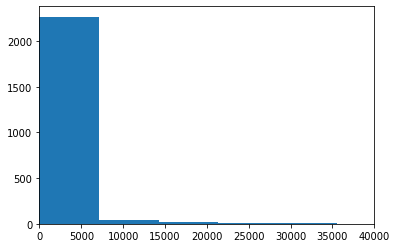

In [53]:
plt.hist(data['distance_pc'], label='distance_pc', bins=100)
plt.xlim(0,40000) #helps narrow down outliers
plt.show

### Below: graph of brightest 17 stars in gaia for same boxed area as above
Compare to Stellarium

In [54]:
sort_by_mag = data.sort_values('phot_g_mean_mag')
sort_by_mag_result = sort_by_mag.head(15)


<function matplotlib.pyplot.show(*args, **kw)>

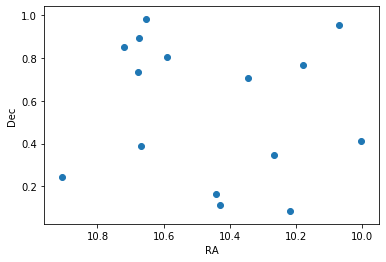

In [22]:
#from Earth's point of view
plt.scatter(sort_by_mag_result['ra'], sort_by_mag_result['dec'])
plt.gca().invert_xaxis()
plt.xlabel("RA")
plt.ylabel("Dec")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

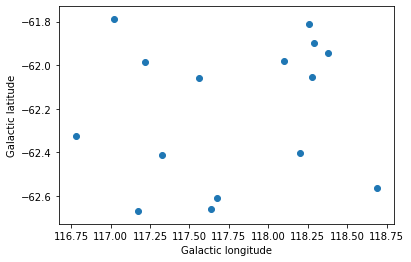

In [23]:
#from outside the galaxy point of view
plt.scatter(sort_by_mag_result['l'], sort_by_mag_result['b'])
#plt.gca().invert_xaxis()
plt.xlabel("Galactic longitude")
plt.ylabel("Galactic latitude")
plt.show

### Below: alien view graph w/ Earth in the center
- Parallax: R, turns into distance, error makes it negative (ignore negatives for now)
- Galactic longitude: l, Ө (around)
- Galactic latitude: b, Φ (above/below)


- x = RcosΦcosӨ = Rcos(b)cos(l)
- y = RcosΦsinӨ = Rcos(b)sin(l)
- z = RsinΦ = Rsin(b)

Start with 1pc away, then 5pc, then 10pc.

Reference for 3d graphs: https://matplotlib.org/examples/mplot3d/surface3d_demo.html

In [24]:
#Functions for x, y, and z
import math
def x(R, b, l):
    return R * math.cos(b) * math.cos(l)

def y(R, b, l):
    return R * math.cos(b) * math.sin(l)

def z(R, b):
    return R * math.sin(b)

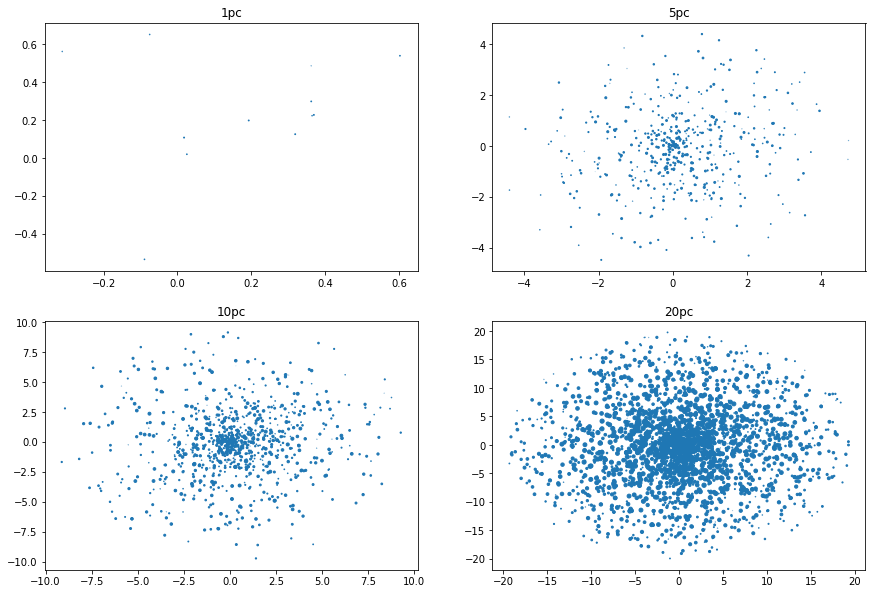

In [64]:
#1pc = d = 1/p, 1pc = 1/p = 1arcsec so p >= 1000 miliarcseconds
data_frame = pd.read_csv("1pc.csv")
one = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'phot_g_mean_mag', 'b', 'l']]
one.loc[:, 'parallax_arcsec'] = one['parallax'].apply(lambda x: x*.001)
one.loc[:, 'R'] = one['parallax_arcsec'].apply(distance)
one.loc[:, 'x'] = one.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
one.loc[:, 'y'] = one.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
one.loc[:, 'z'] = one.apply(lambda r: z(r['R'], r['b']), axis=1)

#5pc = 1/p -> 1/5 arcseconds so p >= 200 miliarcseconds
data_frame = pd.read_csv("5pc.csv")
five = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
five.loc[:, 'parallax_arcsec'] = five['parallax'].apply(lambda x: x*.001)
five.loc[:, 'R'] = five['parallax_arcsec'].apply(distance)
five.loc[:, 'x'] = five.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
five.loc[:, 'y'] = five.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
five.loc[:, 'z'] = five.apply(lambda r: z(r['R'], r['b']), axis=1)

#10pc = 1/p -> 1/10 arcseconds so p >= 100 miliarcseconds
data_frame = pd.read_csv("10pc.csv")
ten = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
ten.loc[:, 'parallax_arcsec'] = ten['parallax'].apply(lambda x: x*.001)
ten.loc[:, 'R'] = ten['parallax_arcsec'].apply(distance)
ten.loc[:, 'x'] = ten.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
ten.loc[:, 'y'] = ten.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
ten.loc[:, 'z'] = ten.apply(lambda r: z(r['R'], r['b']), axis=1)

#20pc
data_frame = pd.read_csv("20pc.csv")
twenty = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
twenty.loc[:, 'parallax_arcsec'] = twenty['parallax'].apply(lambda x: x*.001)
twenty.loc[:, 'R'] = twenty['parallax_arcsec'].apply(distance)
twenty.loc[:, 'x'] = twenty.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
twenty.loc[:, 'y'] = twenty.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
twenty.loc[:, 'z'] = twenty.apply(lambda r: z(r['R'], r['b']), axis=1)

fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(one['x'], one['y'], one['z'])
axs[0, 0].set_title('1pc')
axs[0, 1].scatter(five['x'], five['y'], five['z'])
axs[0, 1].set_title('5pc')
axs[1, 0].scatter(ten['x'], ten['y'], ten['z'])
axs[1, 0].set_title('10pc')
axs[1, 1].scatter(twenty['x'], twenty['y'], twenty['z'])
axs[1, 1].set_title('20pc')

#left, bottom, right, top
plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)

#for ax in axs.flat:
#    ax.set(xlabel='x-label', ylabel='y-label')


Analysis: There should not be stars within 1 pc of us, so thise data is off. This is possibly higher magnitudes of light that the camera caught that were not actual stars because they were very dim.

Next data set: magnitudes less than 16

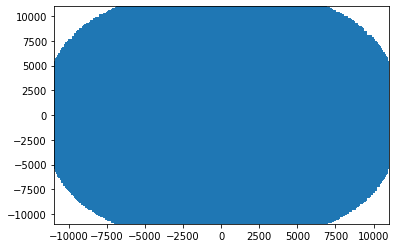

In [66]:
#Between 10,000 and 10,001.01 pc, parallax bw 0.1 and 0.09999
data_frame = pd.read_csv("between1pc.csv", low_memory=False)
between1 = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
between1.loc[:, 'parallax_arcsec'] = between1['parallax'].apply(lambda x: x*.001)
between1.loc[:, 'R'] = between1['parallax_arcsec'].apply(distance)
between1.loc[:, 'x'] = between1.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
between1.loc[:, 'y'] = between1.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
between1.loc[:, 'z'] = between1.apply(lambda r: z(r['R'], r['b']), axis=1)
between1.describe()
plt.scatter(between1['x'], between1['y'], between1['z'], marker=',')
plt.show()

### Below: the same data used for the 2d graphs above used in 3d graphs

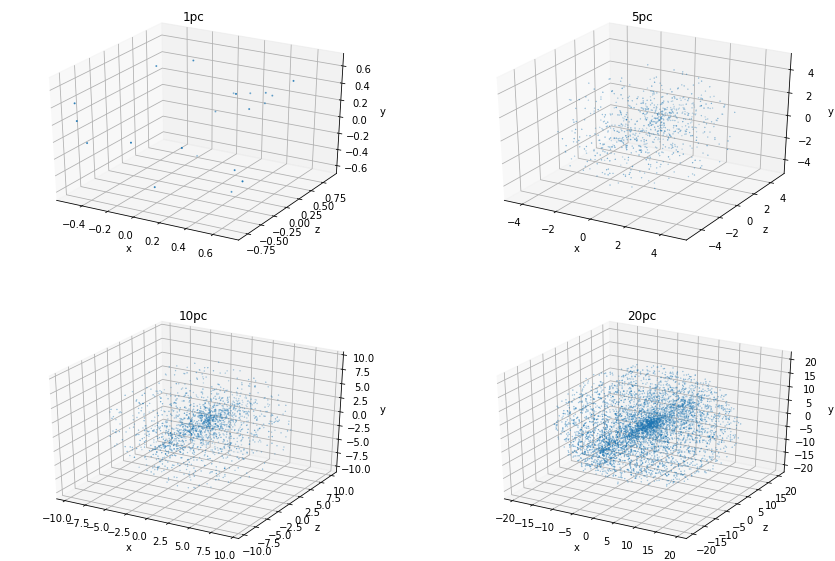

In [68]:
fig = plt.figure()
ax1 = fig.add_subplot(221, projection ='3d') #221
ax1.scatter(one['x'], one['z'], one['y'],  s=1)
ax1.set_title('1pc')
ax1.set_xlabel('x')
ax1.set_ylabel('z')
ax1.set_zlabel('y')

ax5 = fig.add_subplot(222, projection ='3d') #222
ax5.scatter(five['x'], five['z'], five['y'], s=0.1)
ax5.set_title('5pc')
ax5.set_xlabel('x')
ax5.set_ylabel('z')
ax5.set_zlabel('y')

ax10 = fig.add_subplot(223, projection ='3d') #223
ax10.scatter(ten['x'], ten['z'], ten['y'], s=0.1)
ax10.set_title('10pc')
ax10.set_xlabel('x')
ax10.set_ylabel('z')
ax10.set_zlabel('y')

ax20 = fig.add_subplot(224, projection ='3d') #224
ax20.scatter(twenty['x'], twenty['z'], twenty['y'], s=0.1)
ax20.set_title('20pc')
ax20.set_xlabel('x')
ax20.set_ylabel('z')
ax20.set_zlabel('y')

plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)

Again, there should be no stars within 1pc of Earth

### Below are stars between 10,000 and 10,001.01 pc, viwed from 3 different angles

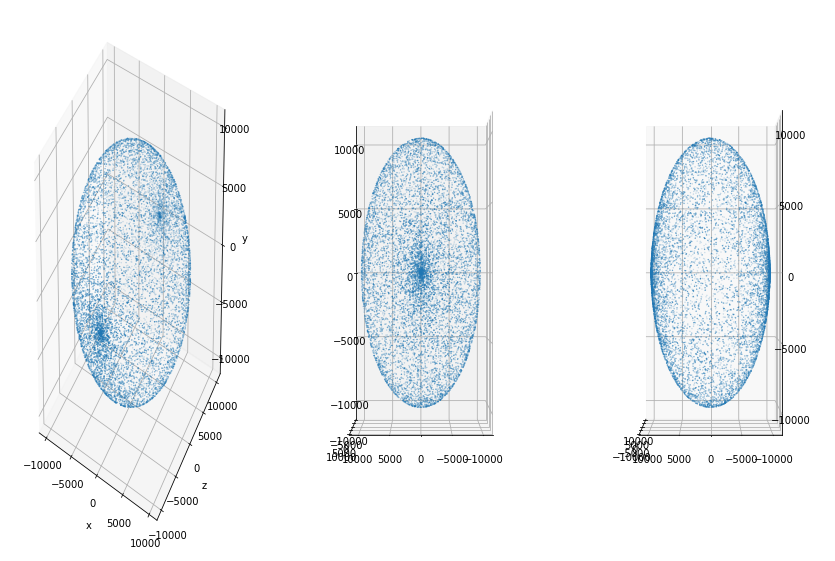

In [30]:
fig = plt.figure()
axbw = fig.add_subplot(131, projection ='3d')
axbw.scatter(between1['x'], between1['z'], between1['y'], s=0.1)
axbw.set_xlabel('x')
axbw.set_ylabel('z')
axbw.set_zlabel('y')
plt.show
#axbw.view_init(0, 180)
axbw1 = fig.add_subplot(132, projection ='3d')
axbw1.scatter(between1['x'], between1['z'], between1['y'], s=0.1)
axbw1.view_init(0, 90)
plt.show
axbw2 = fig.add_subplot(133, projection ='3d')
axbw2.scatter(between1['x'], between1['z'], between1['y'], s=0.1)
axbw2.view_init(0, 180)
plt.show

plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)

### Below: Splitting the 20pc data

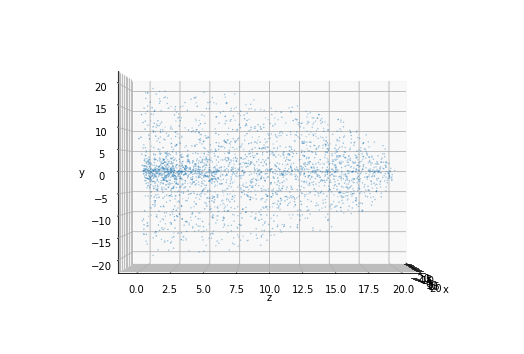

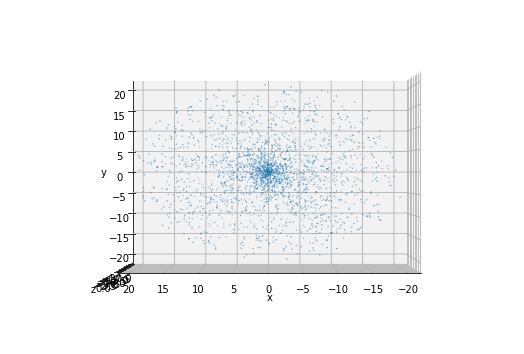

In [33]:
# -    -20 pc < Z < -10 pc
# -     -10 pc < Z < 0 pc
# -       0 pc < Z < 10 pc
# -      10 pc < Z < 20 pc

twenty_greater = twenty[ 0 < twenty.z]
fig = plt.figure()
axtwentyg = fig.add_subplot(221, projection ='3d')
axtwentyg.scatter(twenty_greater['x'], twenty_greater['z'], twenty_greater['y'], s=0.1)
axtwentyg.set_xlabel('x')
axtwentyg.set_ylabel('z')
axtwentyg.set_zlabel('y')
axtwentyg.view_init(0, 0)
plt.subplots_adjust(0.4, 0.4, 3, 3)

twenty_less = twenty[twenty.z < 0]
fig = plt.figure()
axtwentyl = fig.add_subplot(222, projection ='3d')
axtwentyl.scatter(twenty_less['x'], twenty_less['z'], twenty_less['y'], s=0.1)
axtwentyl.set_xlabel('x')
axtwentyl.set_ylabel('z')
axtwentyl.set_zlabel('y')
axtwentyl.view_init(0, 90)

plt.subplots_adjust(0.4, 0.4, 3, 3)

### Below: trimming the data to remove outlier stars by
- getting rid of low magnitude stars
- getting rid of stars with huge parallax errors

Started with 5pc because when running the query within 1 pc, no stars showed up.

Gaia SQL query for 5pc away:

SELECT * from gaiadr2.gaia_source 
where parallax <= 200 AND 
phot_g_mean_mag < 16 AND 
(parallax_error/parallax) < 0.05

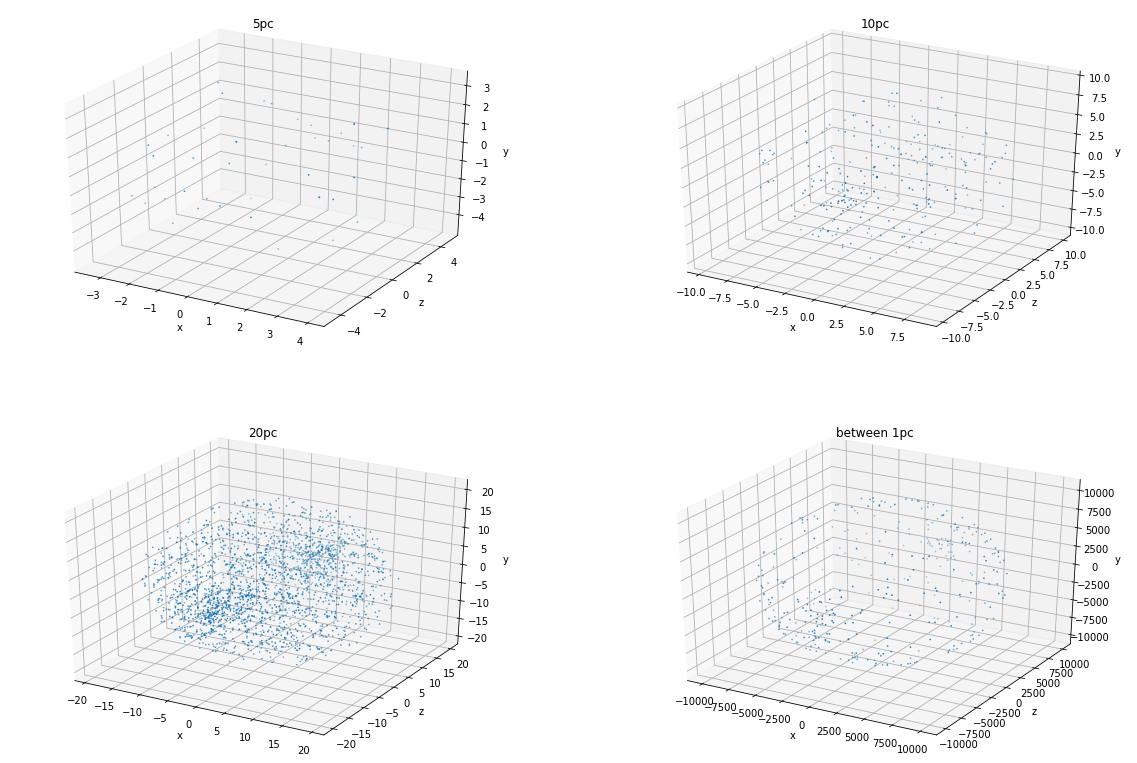

In [35]:
#5pc = 1/p -> 1/5 arcseconds so p >= 200 miliarcseconds
data_frame = pd.read_csv("5pc-result.csv")
five = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
five.loc[:, 'parallax_arcsec'] = five['parallax'].apply(lambda x: x*.001)
five.loc[:, 'R'] = five['parallax_arcsec'].apply(distance)
five.loc[:, 'x'] = five.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
five.loc[:, 'y'] = five.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
five.loc[:, 'z'] = five.apply(lambda r: z(r['R'], r['b']), axis=1)


#10pc = 1/p -> 1/10 arcseconds so p >= 100 miliarcseconds
data_frame = pd.read_csv("10pc-result.csv")
ten = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
ten.loc[:, 'parallax_arcsec'] = ten['parallax'].apply(lambda x: x*.001)
ten.loc[:, 'R'] = ten['parallax_arcsec'].apply(distance)
ten.loc[:, 'x'] = ten.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
ten.loc[:, 'y'] = ten.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
ten.loc[:, 'z'] = ten.apply(lambda r: z(r['R'], r['b']), axis=1)


#20pc
data_frame = pd.read_csv("20pc-result.csv")
twenty = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
twenty.loc[:, 'parallax_arcsec'] = twenty['parallax'].apply(lambda x: x*.001)
twenty.loc[:, 'R'] = twenty['parallax_arcsec'].apply(distance)
twenty.loc[:, 'x'] = twenty.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
twenty.loc[:, 'y'] = twenty.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
twenty.loc[:, 'z'] = twenty.apply(lambda r: z(r['R'], r['b']), axis=1)


#Between 10,000 and 10,001.01 pc, parallax bw 0.1 and 0.09999
data_frame = pd.read_csv("between1-result.csv")
between1 = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
between1.loc[:, 'parallax_arcsec'] = between1['parallax'].apply(lambda x: x*.001)
between1.loc[:, 'R'] = between1['parallax_arcsec'].apply(distance)
between1.loc[:, 'x'] = between1.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
between1.loc[:, 'y'] = between1.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
between1.loc[:, 'z'] = between1.apply(lambda r: z(r['R'], r['b']), axis=1)


fig = plt.figure()
ax5 = fig.add_subplot(221, projection ='3d') #221
ax5.scatter(five['x'], five['z'], five['y'],  s=0.5)
ax5.set_xlabel('x')
ax5.set_ylabel('z')
ax5.set_zlabel('y')
ax5.set_title('5pc')

ax10 = fig.add_subplot(222, projection ='3d') #222
ax10.scatter(ten['x'], ten['z'], ten['y'], s=0.5)
ax10.set_xlabel('x')
ax10.set_ylabel('z')
ax10.set_zlabel('y')
ax10.set_title('10pc')

ax20 = fig.add_subplot(223, projection ='3d') #223
ax20.scatter(twenty['x'], twenty['z'], twenty['y'], s=0.5)
ax20.set_xlabel('x')
ax20.set_ylabel('z')
ax20.set_zlabel('y')
ax20.set_title('20pc')

axbw = fig.add_subplot(224, projection ='3d') #224
axbw.scatter(between1['x'], between1['z'], between1['y'], s=0.5)
axbw.set_xlabel('x')
axbw.set_ylabel('z')
axbw.set_zlabel('y')
axbw.set_title('between 1pc')

plt.subplots_adjust(0.4, 0.4, 3, 3)

### Below are stars between 10,000 and 10,001.01 pc, viwed from 3 different angles
This was done above, but this is done with the trimmed data to see more prominant stars, not outliers.

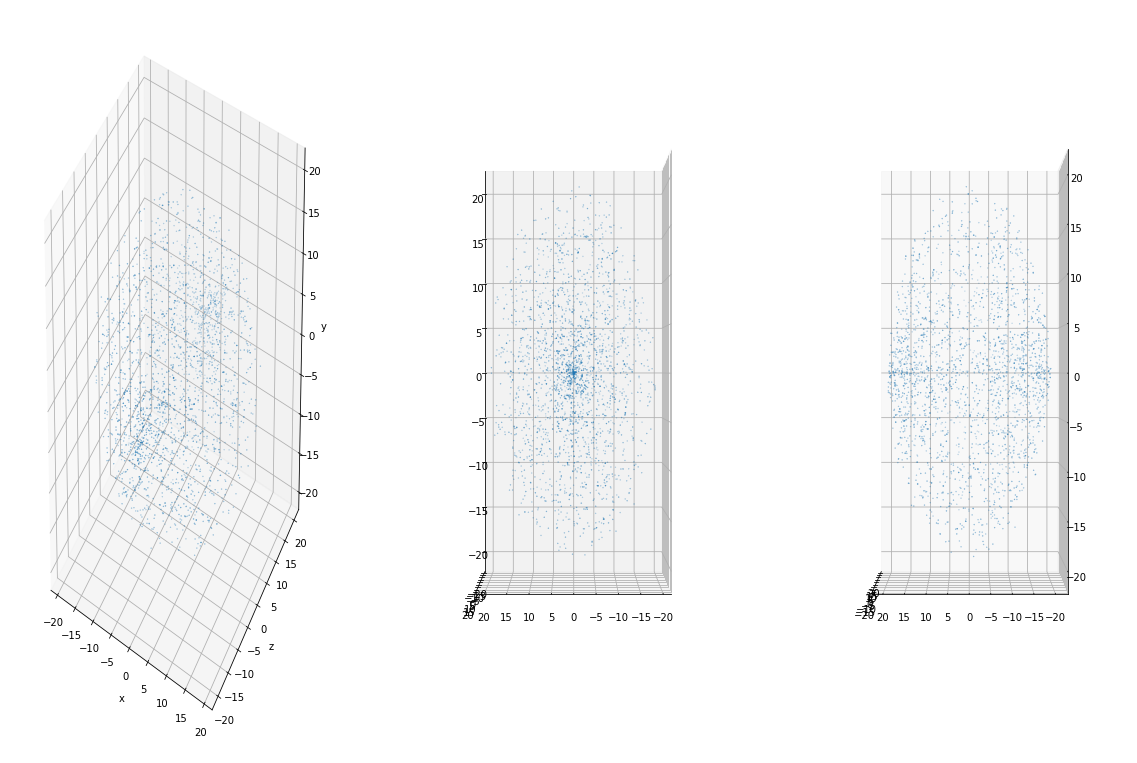

In [36]:
fig = plt.figure()
ax200 = fig.add_subplot(131, projection ='3d')
ax200.scatter(twenty['x'], twenty['z'], twenty['y'], s=0.1)
ax200.set_xlabel('x')
ax200.set_ylabel('z')
ax200.set_zlabel('y')
plt.show

ax201 = fig.add_subplot(132, projection ='3d')
ax201.scatter(twenty['x'], twenty['z'], twenty['y'], s=0.1)
ax201.view_init(0, 90)
plt.show

ax202 = fig.add_subplot(133, projection ='3d')
ax202.scatter(twenty['x'], twenty['z'], twenty['y'], s=0.1)
ax202.view_init(0, 180)
plt.show

plt.subplots_adjust(0.4, 0.4, 3, 3)

### Below: Pleiades Constellation data graphed
#### 1 degree box around the star cluster, possibly break up by parsec

SQL:
SELECT * 
from gaiadr2.gaia_source 
where 
RA between 56.35 and 57.35 AND
DEC between 23.65 and 24.65 AND
parallax > 0

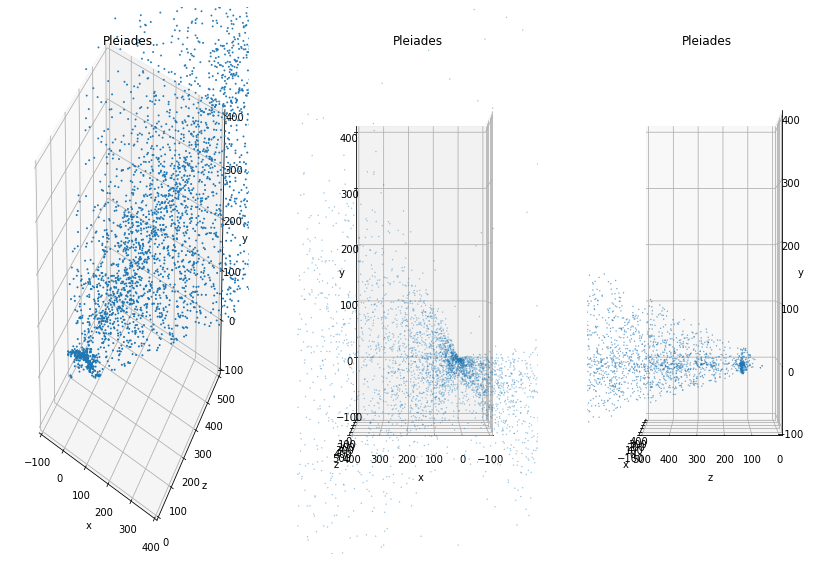

In [114]:
data_frame = pd.read_csv("pleiades.csv")
pleiades = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
pleiades.loc[:, 'parallax_arcsec'] = pleiades['parallax'].apply(lambda x: x*.001)
pleiades.loc[:, 'R'] = pleiades['parallax_arcsec'].apply(distance)
pleiades.loc[:, 'x'] = pleiades.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
pleiades.loc[:, 'y'] = pleiades.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
pleiades.loc[:, 'z'] = pleiades.apply(lambda r: z(r['R'], r['b']), axis=1)

fig = plt.figure()
axp = fig.add_subplot(131, projection ='3d')
axp.scatter(pleiades['x'], pleiades['z'], pleiades['y'], s=1)
axp.set_xlim([-100, 400])
axp.set_ylim([0, 500])
axp.set_zlim([-100, 400])
axp.set_xlabel('x')
axp.set_ylabel('z')
axp.set_zlabel('y')
axp.set_title('Pleiades')

axp1 = fig.add_subplot(132, projection ='3d')
axp1.scatter(pleiades['x'], pleiades['z'], pleiades['y'], s=0.1)
axp1.set_xlim([-100, 400])
axp1.set_ylim([0, 500])
axp1.set_zlim([-100, 400])
axp1.set_xlabel('x')
axp1.set_ylabel('z')
axp1.set_zlabel('y')
axp1.set_title('Pleiades')
axp1.view_init(0, 90)
plt.show

axp2 = fig.add_subplot(133, projection ='3d')
axp2.scatter(pleiades['x'], pleiades['z'], pleiades['y'], s=0.1)
axp2.set_xlim([-100, 400])
axp2.set_ylim([0, 500])
axp2.set_zlim([-100, 400])
axp2.set_xlabel('x')
axp2.set_ylabel('z')
axp2.set_zlabel('y')
axp2.set_title('Pleiades')
axp2.view_init(0, 180)
plt.show

plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)
plt.show()

### Below: random 1 degree boxes to compare to the Pleiades cluster.

Analysis of the below graphs as well as Pleiades above:

They all look like star clusters when just the Pleiades is a cluster. This is due to outlier "stars" found outside the Milky Way. In order to fix this, I'm going to "zoom" into the part of the graph where each "cluster" (really just the Milky Way) is.

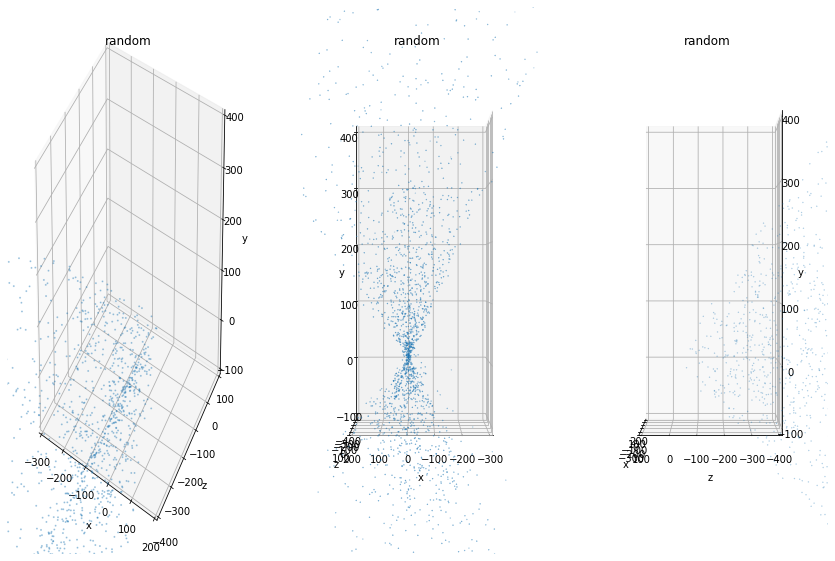

In [116]:
#RA between 6.35 and 7.35
#DEC between 3.65 and 4.65

data_frame = pd.read_csv("random.csv")
random = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
random.loc[:, 'parallax_arcsec'] = random['parallax'].apply(lambda x: x*.001)
random.loc[:, 'R'] = random['parallax_arcsec'].apply(distance)
random.loc[:, 'x'] = random.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
random.loc[:, 'y'] = random.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
random.loc[:, 'z'] = random.apply(lambda r: z(r['R'], r['b']), axis=1)

fig = plt.figure()
axr = fig.add_subplot(131, projection ='3d')
axr.scatter(random['x'], random['z'], random['y'], s=1)
axr.set_xlim([-300, 200])
axr.set_ylim([-400, 100])
axr.set_zlim([-100, 400])
axr.set_xlabel('x')
axr.set_ylabel('z')
axr.set_zlabel('y')
axr.set_title('random')

axr1 = fig.add_subplot(132, projection ='3d')
axr1.scatter(random['x'], random['z'], random['y'], s=0.1)
axr1.set_xlim([-300, 200])
axr1.set_ylim([-400, 100])
axr1.set_zlim([-100, 400])
axr1.set_xlabel('x')
axr1.set_ylabel('z')
axr1.set_zlabel('y')
axr1.set_title('random')
axr1.view_init(0, 90)
plt.show

axr2 = fig.add_subplot(133, projection ='3d')
axr2.scatter(random['x'], random['z'], random['y'], s=0.1)
axr2.set_xlim([-300, 200])
axr2.set_ylim([-400, 100])
axr2.set_zlim([-100, 400])
axr2.set_xlabel('x')
axr2.set_ylabel('z')
axr2.set_zlabel('y')
axr2.set_title('random')
axr2.view_init(0, 180)
plt.show

plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)
plt.show()

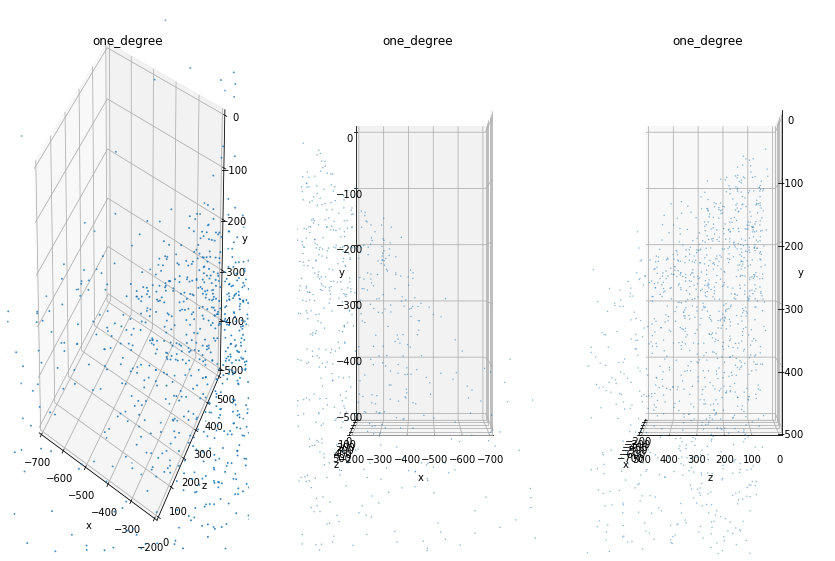

In [118]:
#RA between 10 and 11
#DEC between 0 and 1

data_frame = pd.read_csv("one-degree-box-old.csv")
one_degree = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
one_degree.loc[:, 'parallax_arcsec'] = one_degree['parallax'].apply(lambda x: x*.001)
one_degree.loc[:, 'R'] = one_degree['parallax_arcsec'].apply(distance)
one_degree.loc[:, 'x'] = one_degree.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
one_degree.loc[:, 'y'] = one_degree.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
one_degree.loc[:, 'z'] = one_degree.apply(lambda r: z(r['R'], r['b']), axis=1)

fig = plt.figure()
axo = fig.add_subplot(131, projection ='3d')
axo.scatter(one_degree['x'], one_degree['z'], one_degree['y'], s=1)
axo.set_xlim([-700, -200])
axo.set_ylim([0, 500])
axo.set_zlim([-500, 0])
axo.set_xlabel('x')
axo.set_ylabel('z')
axo.set_zlabel('y')
axo.set_title('one_degree')

axo1 = fig.add_subplot(132, projection ='3d')
axo1.scatter(one_degree['x'], one_degree['z'], one_degree['y'], s=0.1)
axo1.set_xlim([-700, -200])
axo1.set_ylim([0, 500])
axo1.set_zlim([-500, 0])
axo1.set_xlabel('x')
axo1.set_ylabel('z')
axo1.set_zlabel('y')
axo1.set_title('one_degree')
axo1.view_init(0, 90)
plt.show

axo2 = fig.add_subplot(133, projection ='3d')
axo2.scatter(one_degree['x'], one_degree['z'], one_degree['y'], s=0.1)
axo2.set_xlim([-700, -200])
axo2.set_ylim([0, 500])
axo2.set_zlim([-500, 0])
axo2.set_xlabel('x')
axo2.set_ylabel('z')
axo2.set_zlabel('y')
axo2.set_title('one_degree')
axo2.view_init(0, 180)
plt.show

plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)
plt.show()

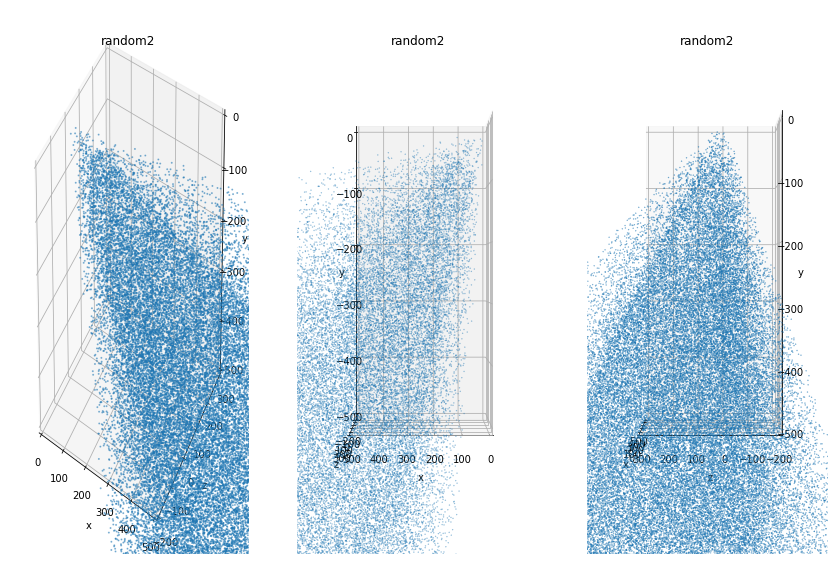

In [120]:
#RA between 277 and 278
#DEC between -32 and -31

data_frame = pd.read_csv("new.csv")
new= data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
new.loc[:, 'parallax_arcsec'] = new['parallax'].apply(lambda x: x*.001)
new.loc[:, 'R'] = new['parallax_arcsec'].apply(distance)
new.loc[:, 'x'] = new.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
new.loc[:, 'y'] = new.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
new.loc[:, 'z'] = new.apply(lambda r: z(r['R'], r['b']), axis=1)

fig = plt.figure()
axn = fig.add_subplot(131, projection ='3d')
axn.scatter(new['x'], new['z'], new['y'], s=1)
axn.set_xlim([0, 500])
axn.set_ylim([-200, 300])
axn.set_zlim([-500, 0])
axn.set_xlabel('x')
axn.set_ylabel('z')
axn.set_zlabel('y')
axn.set_title('random2')

axn1 = fig.add_subplot(132, projection ='3d')
axn1.scatter(new['x'], new['z'], new['y'], s=0.1)
axn1.set_xlim([0, 500])
axn1.set_ylim([-200, 300])
axn1.set_zlim([-500, 0])
axn1.set_xlabel('x')
axn1.set_ylabel('z')
axn1.set_zlabel('y')
axn1.set_title('random2')
axn1.view_init(0, 90)
plt.show

axn2 = fig.add_subplot(133, projection ='3d')
axn2.scatter(new['x'], new['z'], new['y'], s=0.1)
axn2.set_xlim([0, 500])
axn2.set_ylim([-200, 300])
axn2.set_zlim([-500, 0])
axn2.set_xlabel('x')
axn2.set_ylabel('z')
axn2.set_zlabel('y')
axn2.set_title('random2')
axn2.view_init(0, 180)
plt.show

plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)
plt.show()

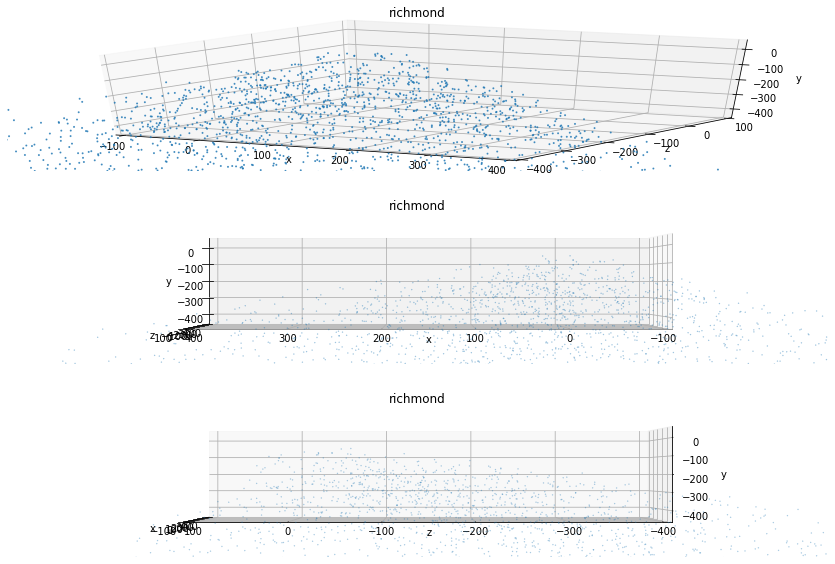

In [121]:
#Richmond's

#RA between
#DEC between 17.5 and 18.5

data_frame = pd.read_csv("richmond.csv")
richmond = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
richmond.loc[:, 'parallax_arcsec'] = richmond['parallax'].apply(lambda x: x*.001)
richmond.loc[:, 'R'] = richmond['parallax_arcsec'].apply(distance)
richmond.loc[:, 'x'] = richmond.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
richmond.loc[:, 'y'] = richmond.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
richmond.loc[:, 'z'] = richmond.apply(lambda r: z(r['R'], r['b']), axis=1)

fig = plt.figure()
axr = fig.add_subplot(311, projection ='3d')
axr.scatter(richmond['x'], richmond['z'], richmond['y'], s=1)
axr.set_xlim([-100, 400])
axr.set_ylim([-400, 100])
axr.set_zlim([-450, 50])
axr.set_xlabel('x')
axr.set_ylabel('z')
axr.set_zlabel('y')
axr.set_title('richmond')

axr1 = fig.add_subplot(312, projection ='3d')
axr1.scatter(richmond['x'], richmond['z'], richmond['y'], s=0.1)
axr1.set_xlim([-100, 400])
axr1.set_ylim([-400, 100])
axr1.set_zlim([-450, 50])
axr1.set_xlabel('x')
axr1.set_ylabel('z')
axr1.set_zlabel('y')
axr1.set_title('richmond')
axr1.view_init(0, 90)
plt.show

axr2 = fig.add_subplot(313, projection ='3d')
axr2.scatter(richmond['x'], richmond['z'], richmond['y'], s=0.1)
axr2.set_xlim([-100, 400])
axr2.set_ylim([-400, 100])
axr2.set_zlim([-450, 50])
axr2.set_xlabel('x')
axr2.set_ylabel('z')
axr2.set_zlabel('y')
axr2.set_title('richmond')
axr2.view_init(0, 180)
plt.show

plt.subplots_adjust(0.4, 0.4, 2.3, 2.3)
plt.show()

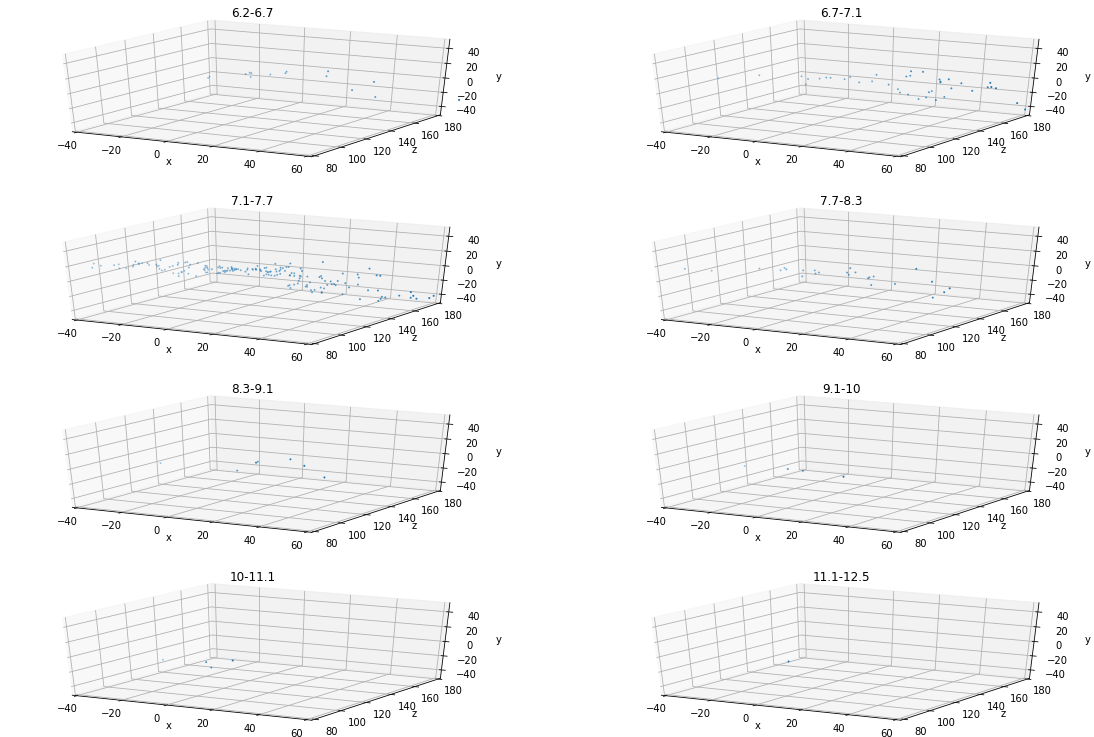

In [127]:
#SELECT * from gaiadr2.gaia_source where 
#RA between 56.35 and 57.35 AND
#DEC between 23.65 and 24.65 AND
#parallax > 6.2 AND parallax <= 6.7

#6.2-6.7
data_frame = pd.read_csv("pleiades6.2-6.7.csv")
a = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
a.loc[:, 'parallax_arcsec'] = a['parallax'].apply(lambda x: x*.001)
a.loc[:, 'R'] = a['parallax_arcsec'].apply(distance)
a.loc[:, 'x'] = a.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
a.loc[:, 'y'] = a.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
a.loc[:, 'z'] = a.apply(lambda r: z(r['R'], r['b']), axis=1)


#6.7-7.1
data_frame = pd.read_csv("pleiades6.7-7.1.csv")
b = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
b.loc[:, 'parallax_arcsec'] = b['parallax'].apply(lambda x: x*.001)
b.loc[:, 'R'] = b['parallax_arcsec'].apply(distance)
b.loc[:, 'x'] = b.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
b.loc[:, 'y'] = b.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
b.loc[:, 'z'] = b.apply(lambda r: z(r['R'], r['b']), axis=1)


#7.1-7.7
data_frame = pd.read_csv("pleiades7.1-7.7.csv")
c = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
c.loc[:, 'parallax_arcsec'] = c['parallax'].apply(lambda x: x*.001)
c.loc[:, 'R'] = c['parallax_arcsec'].apply(distance)
c.loc[:, 'x'] = c.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
c.loc[:, 'y'] = c.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
c.loc[:, 'z'] = c.apply(lambda r: z(r['R'], r['b']), axis=1)


#7.7-8.3
data_frame = pd.read_csv("pleiades7.7-8.3.csv")
d = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
d.loc[:, 'parallax_arcsec'] = d['parallax'].apply(lambda x: x*.001)
d.loc[:, 'R'] = d['parallax_arcsec'].apply(distance)
d.loc[:, 'x'] = d.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
d.loc[:, 'y'] = d.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
d.loc[:, 'z'] = d.apply(lambda r: z(r['R'], r['b']), axis=1)


#8.3-9.1
data_frame = pd.read_csv("pleiades8.3-9.1.csv")
e = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
e.loc[:, 'parallax_arcsec'] = e['parallax'].apply(lambda x: x*.001)
e.loc[:, 'R'] = e['parallax_arcsec'].apply(distance)
e.loc[:, 'x'] = e.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
e.loc[:, 'y'] = e.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
e.loc[:, 'z'] = e.apply(lambda r: z(r['R'], r['b']), axis=1)


#9.1-10
data_frame = pd.read_csv("pleiades9.1-10.csv")
f = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
f.loc[:, 'parallax_arcsec'] = f['parallax'].apply(lambda x: x*.001)
f.loc[:, 'R'] = f['parallax_arcsec'].apply(distance)
f.loc[:, 'x'] = f.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
f.loc[:, 'y'] = f.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
f.loc[:, 'z'] = f.apply(lambda r: z(r['R'], r['b']), axis=1)


#10-11.1
data_frame = pd.read_csv("pleiades10-11.1.csv")
g = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
g.loc[:, 'parallax_arcsec'] = g['parallax'].apply(lambda x: x*.001)
g.loc[:, 'R'] = g['parallax_arcsec'].apply(distance)
g.loc[:, 'x'] = g.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
g.loc[:, 'y'] = g.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
g.loc[:, 'z'] = g.apply(lambda r: z(r['R'], r['b']), axis=1)


#11.1-12.5
data_frame = pd.read_csv("pleiades11.1-12.5.csv")
h = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
h.loc[:, 'parallax_arcsec'] = h['parallax'].apply(lambda x: x*.001)
h.loc[:, 'R'] = h['parallax_arcsec'].apply(distance)
h.loc[:, 'x'] = h.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
h.loc[:, 'y'] = h.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
h.loc[:, 'z'] = h.apply(lambda r: z(r['R'], r['b']), axis=1)


fig = plt.figure()
axa = fig.add_subplot(421, projection ='3d')
axa.scatter(a['x'], a['z'], a['y'],  s=1)
axa.set_xlim([-40, 60])
axa.set_ylim([80, 180])
axa.set_zlim([-50, 50])
axa.set_xlabel('x')
axa.set_ylabel('z')
axa.set_zlabel('y')
axa.set_title('6.2-6.7')

axb = fig.add_subplot(422, projection ='3d')
axb.scatter(b['x'], b['z'], b['y'], s=1)
axb.set_xlim([-40, 60])
axb.set_ylim([80, 180])
axb.set_zlim([-50, 50])
axb.set_xlabel('x')
axb.set_ylabel('z')
axb.set_zlabel('y')
axb.set_title('6.7-7.1')

axc = fig.add_subplot(423, projection ='3d')
axc.scatter(c['x'], c['z'], c['y'], s=1)
axc.set_xlim([-40, 60])
axc.set_ylim([80, 180])
axc.set_zlim([-50, 50])
axc.set_xlabel('x')
axc.set_ylabel('z')
axc.set_zlabel('y')
axc.set_title('7.1-7.7')

axd = fig.add_subplot(424, projection ='3d')
axd.scatter(d['x'], d['z'], d['y'], s=1)
axd.set_xlim([-40, 60])
axd.set_ylim([80, 180])
axd.set_zlim([-50, 50])
axd.set_xlabel('x')
axd.set_ylabel('z')
axd.set_zlabel('y')
axd.set_title('7.7-8.3')

axe = fig.add_subplot(425, projection ='3d')
axe.scatter(e['x'], e['z'], e['y'],  s=1)
axe.set_xlim([-40, 60])
axe.set_ylim([80, 180])
axe.set_zlim([-50, 50])
axe.set_xlabel('x')
axe.set_ylabel('z')
axe.set_zlabel('y')
axe.set_title('8.3-9.1')

axf = fig.add_subplot(426, projection ='3d')
axf.scatter(f['x'], f['z'], f['y'], s=1)
axf.set_xlim([-40, 60])
axf.set_ylim([80, 180])
axf.set_zlim([-50, 50])
axf.set_xlabel('x')
axf.set_ylabel('z')
axf.set_zlabel('y')
axf.set_title('9.1-10')

axg = fig.add_subplot(427, projection ='3d')
axg.scatter(g['x'], g['z'], g['y'], s=1)
axg.set_xlim([-40, 60])
axg.set_ylim([80, 180])
axg.set_zlim([-50, 50])
axg.set_xlabel('x')
axg.set_ylabel('z')
axg.set_zlabel('y')
axg.set_title('10-11.1')

axh = fig.add_subplot(428, projection ='3d')
axh.scatter(h['x'], h['z'], h['y'], s=1)
axh.set_xlim([-40, 60])
axh.set_ylim([80, 180])
axh.set_zlim([-50, 50])
axh.set_xlabel('x')
axh.set_ylabel('z')
axh.set_zlabel('y')
axh.set_title('11.1-12.5')

plt.subplots_adjust(1.5, 1.5, 4, 4)

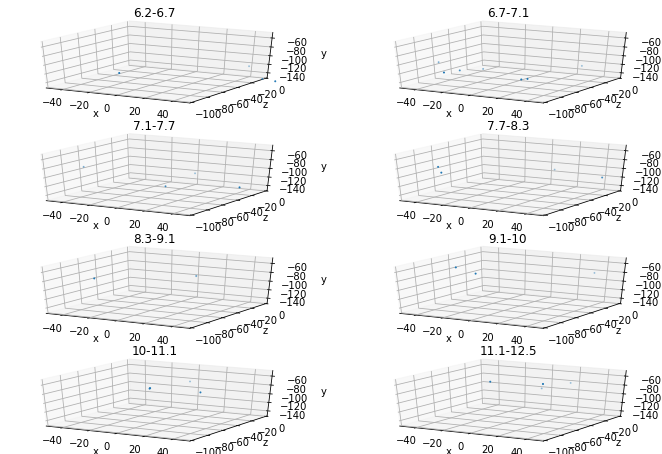

In [128]:
#SELECT * from gaiadr2.gaia_source where 
#RA between 56.35 and 57.35 AND
#DEC between 17.5 and 18.5 AND
#parallax > 6.2 AND parallax <= 6.7

#6.2-6.7
data_frame = pd.read_csv("random6.2-6.7.csv")
a = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
a.loc[:, 'parallax_arcsec'] = a['parallax'].apply(lambda x: x*.001)
a.loc[:, 'R'] = a['parallax_arcsec'].apply(distance)
a.loc[:, 'x'] = a.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
a.loc[:, 'y'] = a.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
a.loc[:, 'z'] = a.apply(lambda r: z(r['R'], r['b']), axis=1)


#6.7-7.1
data_frame = pd.read_csv("random6.7-7.1.csv")
b = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
b.loc[:, 'parallax_arcsec'] = b['parallax'].apply(lambda x: x*.001)
b.loc[:, 'R'] = b['parallax_arcsec'].apply(distance)
b.loc[:, 'x'] = b.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
b.loc[:, 'y'] = b.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
b.loc[:, 'z'] = b.apply(lambda r: z(r['R'], r['b']), axis=1)


#7.1-7.7
data_frame = pd.read_csv("random7.1-7.7.csv")
c = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
c.loc[:, 'parallax_arcsec'] = c['parallax'].apply(lambda x: x*.001)
c.loc[:, 'R'] = c['parallax_arcsec'].apply(distance)
c.loc[:, 'x'] = c.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
c.loc[:, 'y'] = c.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
c.loc[:, 'z'] = c.apply(lambda r: z(r['R'], r['b']), axis=1)


#7.7-8.3
data_frame = pd.read_csv("random7.7-8.3.csv")
d = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
d.loc[:, 'parallax_arcsec'] = d['parallax'].apply(lambda x: x*.001)
d.loc[:, 'R'] = d['parallax_arcsec'].apply(distance)
d.loc[:, 'x'] = d.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
d.loc[:, 'y'] = d.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
d.loc[:, 'z'] = d.apply(lambda r: z(r['R'], r['b']), axis=1)


#8.3-9.1
data_frame = pd.read_csv("random8.3-9.1.csv")
e = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
e.loc[:, 'parallax_arcsec'] = e['parallax'].apply(lambda x: x*.001)
e.loc[:, 'R'] = e['parallax_arcsec'].apply(distance)
e.loc[:, 'x'] = e.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
e.loc[:, 'y'] = e.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
e.loc[:, 'z'] = e.apply(lambda r: z(r['R'], r['b']), axis=1)


#9.1-10
data_frame = pd.read_csv("random9.1-10.csv")
f = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
f.loc[:, 'parallax_arcsec'] = f['parallax'].apply(lambda x: x*.001)
f.loc[:, 'R'] = f['parallax_arcsec'].apply(distance)
f.loc[:, 'x'] = f.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
f.loc[:, 'y'] = f.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
f.loc[:, 'z'] = f.apply(lambda r: z(r['R'], r['b']), axis=1)


#10-11.1
data_frame = pd.read_csv("random10-11.1.csv")
g = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
g.loc[:, 'parallax_arcsec'] = g['parallax'].apply(lambda x: x*.001)
g.loc[:, 'R'] = g['parallax_arcsec'].apply(distance)
g.loc[:, 'x'] = g.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
g.loc[:, 'y'] = g.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
g.loc[:, 'z'] = g.apply(lambda r: z(r['R'], r['b']), axis=1)


#11.1-12.5
data_frame = pd.read_csv("random11.1-12.5.csv")
h = data_frame[['ra', 'dec', 'parallax', 'parallax_error', 'b', 'l']]
h.loc[:, 'parallax_arcsec'] = h['parallax'].apply(lambda x: x*.001)
h.loc[:, 'R'] = h['parallax_arcsec'].apply(distance)
h.loc[:, 'x'] = h.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
h.loc[:, 'y'] = h.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
h.loc[:, 'z'] = h.apply(lambda r: z(r['R'], r['b']), axis=1)


fig = plt.figure()
axa = fig.add_subplot(421, projection ='3d')
axa.scatter(a['x'], a['z'], a['y'],  s=1)
axa.set_xlim([-50, 50])
axa.set_ylim([-100, 0])
axa.set_zlim([-150, -50])
axa.set_xlabel('x')
axa.set_ylabel('z')
axa.set_zlabel('y')
axa.set_title('6.2-6.7')

axb = fig.add_subplot(422, projection ='3d')
axb.scatter(b['x'], b['z'], b['y'], s=1)
axb.set_xlim([-50, 50])
axb.set_ylim([-100, 0])
axb.set_zlim([-150, -50])
axb.set_xlabel('x')
axb.set_ylabel('z')
axb.set_zlabel('y')
axb.set_title('6.7-7.1')

axc = fig.add_subplot(423, projection ='3d')
axc.scatter(c['x'], c['z'], c['y'], s=1)
axc.set_xlim([-50, 50])
axc.set_ylim([-100, 0])
axc.set_zlim([-150, -50])
axc.set_xlabel('x')
axc.set_ylabel('z')
axc.set_zlabel('y')
axc.set_title('7.1-7.7')

axd = fig.add_subplot(424, projection ='3d')
axd.scatter(d['x'], d['z'], d['y'], s=1)
axd.set_xlim([-50, 50])
axd.set_ylim([-100, 0])
axd.set_zlim([-150, -50])
axd.set_xlabel('x')
axd.set_ylabel('z')
axd.set_zlabel('y')
axd.set_title('7.7-8.3')

axe = fig.add_subplot(425, projection ='3d')
axe.scatter(e['x'], e['z'], e['y'],  s=1)
axe.set_xlim([-50, 50])
axe.set_ylim([-100, 0])
axe.set_zlim([-150, -50])
axe.set_xlabel('x')
axe.set_ylabel('z')
axe.set_zlabel('y')
axe.set_title('8.3-9.1')

axf = fig.add_subplot(426, projection ='3d')
axf.scatter(f['x'], f['z'], f['y'], s=1)
axf.set_xlim([-50, 50])
axf.set_ylim([-100, 0])
axf.set_zlim([-150, -50])
axf.set_xlabel('x')
axf.set_ylabel('z')
axf.set_zlabel('y')
axf.set_title('9.1-10')

axg = fig.add_subplot(427, projection ='3d')
axg.scatter(g['x'], g['z'], g['y'], s=1)
axg.set_xlim([-50, 50])
axg.set_ylim([-100, 0])
axg.set_zlim([-150, -50])
axg.set_xlabel('x')
axg.set_ylabel('z')
axg.set_zlabel('y')
axg.set_title('10-11.1')

axh = fig.add_subplot(428, projection ='3d')
axh.scatter(h['x'], h['z'], h['y'], s=1)
axh.set_xlim([-50, 50])
axh.set_ylim([-100, 0])
axh.set_zlim([-150, -50])
axh.set_xlabel('x')
axh.set_ylabel('z')
axh.set_zlabel('y')
axh.set_title('11.1-12.5')

plt.subplots_adjust(1.5, 1.5, 3, 3)

## Machine Learning
#### K-means algorithm
*Look into heirarchical clustering

In [44]:
pleiades

,ra,dec,parallax,parallax_error,b,l,parallax_arcsec,R,x,y,z
0,56.544299,23.852152,0.449200,1.287650,-23.843327,166.613013,0.000449,2226.178497,-614.532309,-67.003359,2138.628367
1,57.065831,23.696713,0.415548,0.454624,-23.636025,167.112412,0.000416,2406.457978,-146.189995,-101.740627,2399.857773
2,56.639273,23.967605,1.542492,0.044328,-23.699488,166.598436,0.001542,648.301564,-88.495653,-8.345459,642.178939
3,56.445009,23.650847,0.864438,0.086946,-24.053476,166.687393,0.000864,1156.820385,-536.876270,-99.349967,1019.866098
4,56.838247,23.721293,2.765235,0.837524,-23.758842,166.926627,0.002765,361.632870,-64.532605,-28.990245,354.645515
...,...,...,...,...,...,...,...,...,...,...,...
5415,56.851072,24.562739,0.271612,0.154048,-23.129119,166.318168,0.000272,3681.729006,1517.552068,-285.947251,3342.214590
5416,57.154146,24.588707,0.640921,0.367009,-22.924295,166.520538,0.000641,1560.253975,928.712416,14.978695,1253.659185
5417,56.631130,24.333363,1.848843,0.027132,-23.433535,166.324375,0.001849,540.878676,68.143824,-12.402622,536.425518
5418,56.690905,24.575902,0.086584,0.181614,-23.217166,166.191130,0.000087,11549.509472,3713.601399,-1203.015085,10869.824672


In [45]:
train = pleiades.head(3794)
test = pleiades.tail(1626)

In [46]:
#weighted fractions
from sklearn.cluster import KMeans

# create kmeans object, 2 clusters
kmeans = KMeans(n_clusters=2)
# fit kmeans object to data
kmeans.fit(train.values) #X = data set excluding name of galaxy
# save new clusters for chart
y_km = kmeans.predict(train.values) #or fit_predict

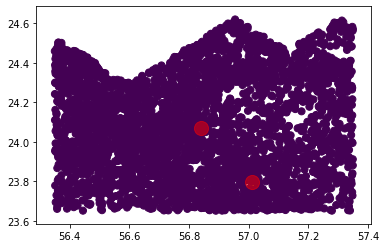

In [47]:
#.values - changes pandas dataframe to numpy array
plt.scatter(train.values[:, 0], train.values[:, 1], c=y_km, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

Check out later:
    https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html#sphx-glr-auto-examples-cluster-plot-cluster-iris-py